# Response curves of "HPF-Pre Series 3" high pass filter preamp

This is a demo of my audio testing library, using my HPF-Pre Series 3 preamp as device-under-test. For this test, I do not have any speakers hooked up. I've got a cheap USB audio adapter.

Hardware setup: For now, I've connected a patch cord from Line Out to Line In on my audio adapter.

In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import time
import pyAudioTest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



# Checking out the audio test setup

This is the guts of the test program that I wrote for my pyAudioTest library. It makes sense to
run this and make sure that the audio subsytem is working before trying to test anything
with it.

In [18]:
'''
Make sure there's no audio already running
'''

if "audio" in locals():
    pyAudioTest.stopAudio(stream)
    del audio, stream
    
audio, stream = pyAudioTest.startAudio()

Check to make sure that the test setup generates a sensible signal. Repeat the sinewave test until the amplitude is below 32000.

Text(0, 0.5, 'Amplitude')

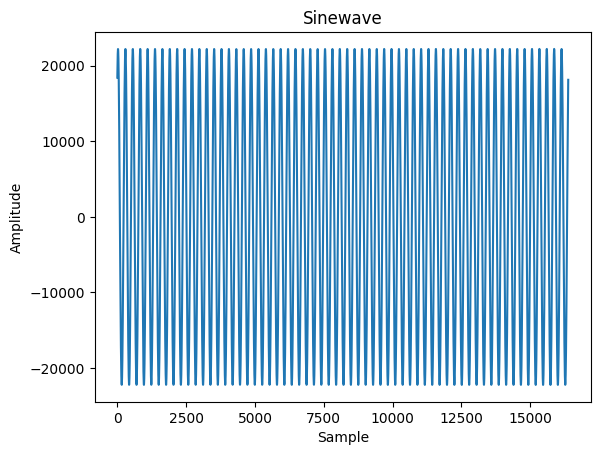

In [28]:
pyAudioTest.globals['generate'] = 2 # Choose sinewave output for now
time.sleep(2)
pyAudioTest.waitCycle()
data = pyAudioTest.analyzeAudio(stream)
plt.plot(data['data'][0])
plt.title('Sinewave')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

Now switch to the tone cluster waveform. This is what we'll be using for the frequency response test. Again, adjust the volume control until the overall amplitude is below 32000 units.

Text(0.5, 1.0, 'Tone cluster waveform')

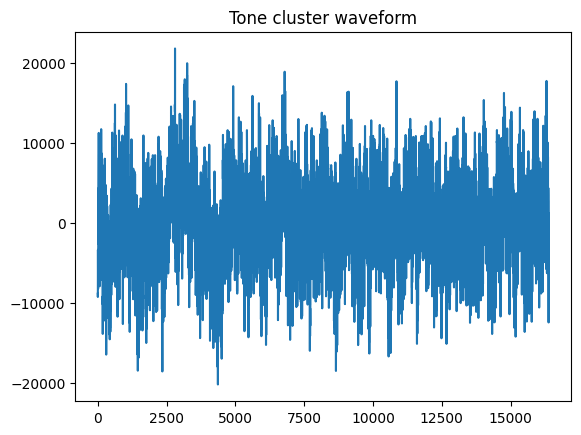

In [29]:
pyAudioTest.globals['generate'] = 1 # the tone cluster waveform
time.sleep(2)
pyAudioTest.waitCycle()
data = pyAudioTest.analyzeAudio(stream)
plt.plot(data['data'][0])
plt.title('Tone cluster waveform')

Before we continue, let's see what this waveform actually produces in frequency space. It's a bunch of discrete peaks, all of which are 1 unit wide. In subsequent graphs, I will only show the tips of the peaks. The rest is noise.

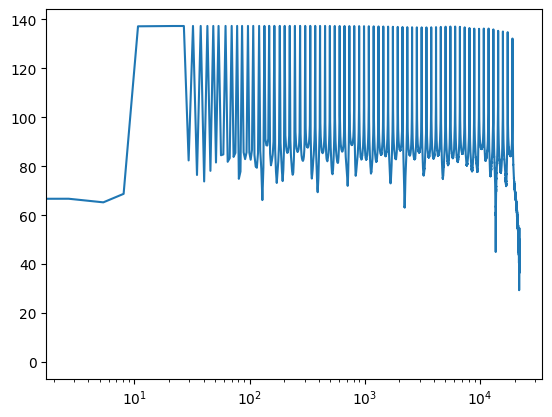

In [30]:
plt.semilogx(pyAudioTest.frequencyScale, data['dbfft'][0])

Here's a plot of just the tones in the tone cluster waveform. Some things are immediately noticeable. First, the response curve looks quite smooth. That's good. It means the analyzer produces a good display from a single block of data with no averaging needed. Second, the curve looks wiggly at high frequencies, but the wiggles are all within 1/2 dB of a response curve that you'd expect if the 3 dB point is at 20 kHz. The audio adapter is performing well.

Text(0, 0.5, 'Amplitude (dB)')

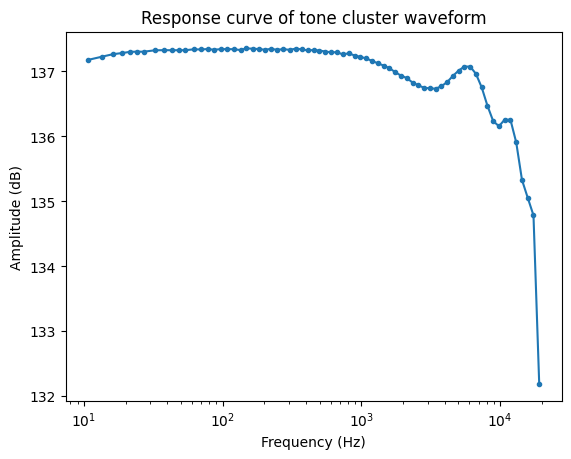

In [32]:
plt.semilogx(pyAudioTest.toneFrequency, data['dbfft'][0][pyAudioTest.toneIndex], marker = '.')
plt.title('Response curve of tone cluster waveform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')

# On with the testing

Now I've changed my test setup. I ran patch cables from Line Out of the audio adapter to the input of the HPF-Pre, and from the output of the HPF-Pre to Line In. The HPF has only one knob, for the cutoff frequency of the filter. I will try 3 knob settings.

First I will measure and record a "baseline" which is the response of the patch cord. This defines a 0 dB level at each frequency.

In [33]:
pyAudioTest.waitCycle() # make sure one "cycle" of data have been collected
baseline = pyAudioTest.analyzeAudio(stream)['dbfft']

Next, I will define a function for the response curve, for convenience, 

In [38]:
def response():
    pyAudioTest.waitCycle() # make sure one "cycle" of data have been collected
    data = pyAudioTest.analyzeAudio(stream)
    return (data['dbfft'] - baseline)[0][pyAudioTest.toneIndex]

in_1 = response()

Text(0, 0.5, 'Response (dB)')

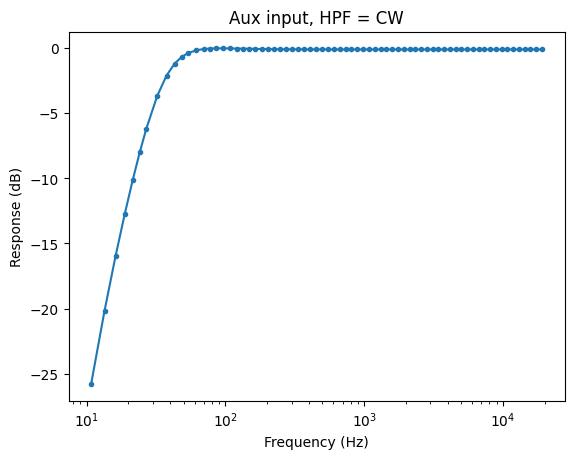

In [39]:
plt.semilogx(pyAudioTest.toneFrequency, in_1, marker = '.')
plt.title('Aux input, HPF = CW')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Response (dB)')

Now I'm going to record curves at 3 positions of the frequency knob.

In [52]:
in_cw = response()

In [53]:
in_center = response()

In [54]:
in_ccw = response()

Finally, I'll graph all of the curves together, to see how the frequency knob affects the response curve of the HPF.

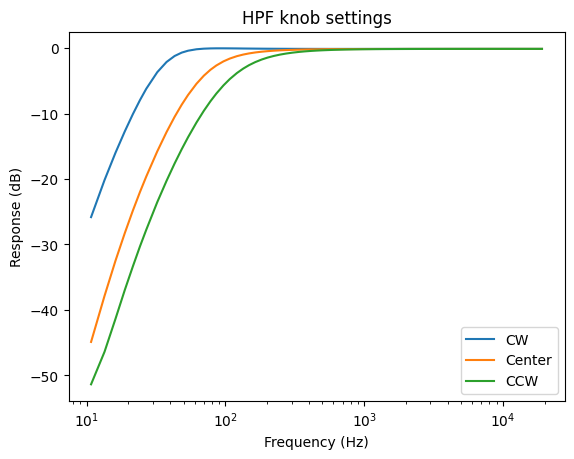

In [55]:
plt.semilogx(pyAudioTest.toneFrequency, in_cw, label = 'CW')
plt.semilogx(pyAudioTest.toneFrequency, in_center, label = 'Center')
plt.semilogx(pyAudioTest.toneFrequency, in_ccw, label = 'CCW')
plt.title('HPF knob settings')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Response (dB)')
plt.legend()